# import libraries

In [106]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

Import Data

In [107]:
df = pd.read_csv('AAPL.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,23.914482,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.315199,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,22.858934,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,21.894178,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.009943,283192000
5,2016-01-11,24.742500,24.764999,24.334999,24.632500,22.366339,198957600
6,2016-01-12,25.137501,25.172501,24.709999,24.990000,22.690950,196616800
7,2016-01-13,25.080000,25.297501,24.325001,24.347500,22.107563,249758400
8,2016-01-14,24.490000,25.120001,23.934999,24.879999,22.591070,252680400
9,2016-01-15,24.049999,24.427500,23.840000,24.282499,22.048532,319335600


In [108]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1776,2023-01-24,140.309998,143.160004,140.300003,142.529999,141.365372,66435100
1777,2023-01-25,140.889999,142.429993,138.809998,141.860001,140.700851,65799300
1778,2023-01-26,143.169998,144.250000,141.899994,143.960007,142.783707,54105100
1779,2023-01-27,143.160004,147.229996,143.080002,145.929993,144.737595,70555800
1780,2023-01-30,144.960007,145.550003,142.850006,143.000000,141.831528,64015300


In [109]:
df.shape

(1781, 7)

In [110]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1.781000e+03
mean,79.731675,80.661958,78.842842,79.790780,77.681903,1.204399e+08
std,49.436845,50.102327,48.773052,49.459560,49.504535,5.743585e+07
min,22.500000,22.917500,22.367500,22.584999,20.744020,3.519590e+07
25%,39.262501,39.532501,38.875000,39.205002,37.018375,8.312160e+07
50%,54.502499,55.197498,54.012501,54.432499,52.048088,1.051040e+08
75%,130.470001,132.220001,129.039993,130.839996,128.560867,1.401052e+08
max,182.630005,182.940002,179.119995,182.009995,179.481110,5.334788e+08


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1781 non-null   object 
 1   Open       1781 non-null   float64
 2   High       1781 non-null   float64
 3   Low        1781 non-null   float64
 4   Close      1781 non-null   float64
 5   Adj Close  1781 non-null   float64
 6   Volume     1781 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 97.5+ KB


In [112]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [113]:
df1=df.reset_index()['Close']
df1

0        26.337500
1        25.677500
2        25.174999
3        24.112499
4        24.240000
           ...    
1776    142.529999
1777    141.860001
1778    143.960007
1779    145.929993
1780    143.000000
Name: Close, Length: 1781, dtype: float64

Text(0, 0.5, 'Closing Price')

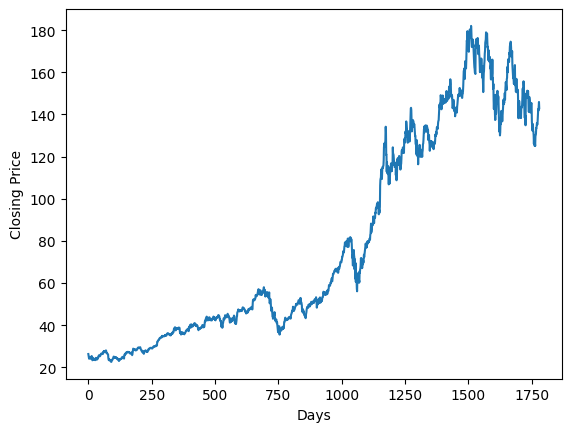

In [114]:
plt.plot(df1)
plt.xlabel('Days')
plt.ylabel('Closing Price')

In [155]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.02353772],
       [0.01939784],
       [0.01624588],
       ...,
       [0.76132985],
       [0.77368667],
       [0.75530816]])

Splitting dataset into train and test split

In [116]:
training_size=int(len(df1)*0.70)
# test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [117]:
print(train_data.shape)
print(test_data.shape)

(1246, 1)
(535, 1)


In [118]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [120]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [121]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(1145, 100)
(1145,)
(434, 100)
(434,)


In [122]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [123]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [124]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

# Define the Sequential model
model = Sequential()

# Add an Input layer as the first layer
model.add(Input(shape=(100, 1)))

# Add the LSTM layers
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

# Add the Dense layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


In [126]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [127]:
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test,y_test), verbose=1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 0.0394 - val_loss: 0.0347
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0020 - val_loss: 0.0040
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 7.8427e-04 - val_loss: 0.0070
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 6.0796e-04 - val_loss: 0.0025
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 5.4460e-04 - val_loss: 0.0024
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 5.1343e-04 - val_loss: 0.0025
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 4.5739e-04 - val_loss: 0.0023
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 4.6813e-04 - val_loss: 0.0024
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 4.2611e-04 - val_loss: 0.0041
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 4.1850e-04 - val_loss: 0.0021
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 4.8768e-04 - val_loss: 0.0020
Epoch 12/100
18/

In [128]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [129]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [130]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

58.51264920397

In [131]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

142.0507639129583

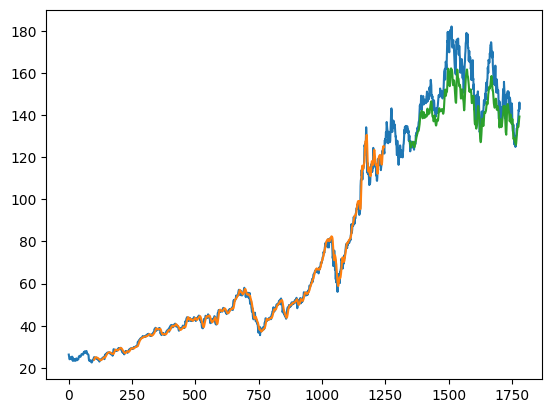

In [132]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [133]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 194)

In [134]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.873169186091747,
 0.880006332256706,
 0.8418692637132009,
 0.8404266041192185,
 0.8847734266212557,
 0.8472008680495748,
 0.8491454376451733,
 0.8586796326468153,
 0.8997021081938745,
 0.8416810937225929,
 0.8448800588334341,
 0.8121373827727743,
 0.8275050921124063,
 0.7772620612140395,
 0.7525482327752419,
 0.7810883181706337,
 0.7712403768854416,
 0.7944488579444593,
 0.7416340659654149,
 0.719868338588511,
 0.7213736859682908,
 0.7559981497506201,
 0.7387486589618607,
 0.7397522845162875,
 0.7602007404158881,
 0.796957837151208,
 0.7919397846495791,
 0.7911244231738916,
 0.8068057784364002,
 0.7702368454191463,
 0.7750039397836961,
 0.7911244231738916,
 0.7864200165951392,
 0.7530500424161841,
 0.7184883730528682,
 0.6855575270016002,
 0.6910773013285821,
 0.707824976203857,
 0.6741414564626993,
 0.6835502696202044,
 0.7105849072751427,
 0.7073232543785042,
 0.7256390647800298,
 0.7469029825159913,
 0.7469029825159913,
 0.7204328422877927,
 0.7316606550204963,
 0.715916605699648

In [135]:
# demonstrate prediction for next 30 days
lst_output=[]
n_steps=193
i=0
while(i<30):
    
    if(len(temp_input)>193):
        # print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

# print(lst_output)

0 day input [0.88000633 0.84186926 0.8404266  0.88477343 0.84720087 0.84914544
 0.85867963 0.89970211 0.84168109 0.84488006 0.81213738 0.82750509
 0.77726206 0.75254823 0.78108832 0.77124038 0.79444886 0.74163407
 0.71986834 0.72137369 0.75599815 0.73874866 0.73975228 0.76020074
 0.79695784 0.79193978 0.79112442 0.80680578 0.77023685 0.77500394
 0.79112442 0.78642002 0.75305004 0.71848837 0.68555753 0.6910773
 0.70782498 0.67414146 0.68355027 0.71058491 0.70732325 0.72563906
 0.74690298 0.74690298 0.72043284 0.73166066 0.71591661 0.72977887
 0.74627569 0.75480635 0.77632122 0.78064919 0.76703779 0.77324764
 0.77092683 0.78961898 0.80028228 0.78083745 0.8054885  0.81828444
 0.8327741  0.82487063 0.81771994 0.80925206 0.84180648 0.84531918
 0.87768543 0.87141289 0.86200407 0.90039209 0.89838484 0.89549952
 0.89248863 0.89280227 0.9198997  0.91519529 0.93783918 0.94467622
 0.9436726  0.95320689 0.95069781 0.93420109 0.90942457 0.90729183
 0.90917362 0.92485497 0.88464795 0.87059752 0.8551

In [136]:
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))

In [137]:
original_data = scaler.inverse_transform(df1)

In [138]:
# Generate x-axis values for plotting
day_new = np.arange(len(original_data))
day_pred = np.arange(len(original_data), len(original_data) + len(lst_output))

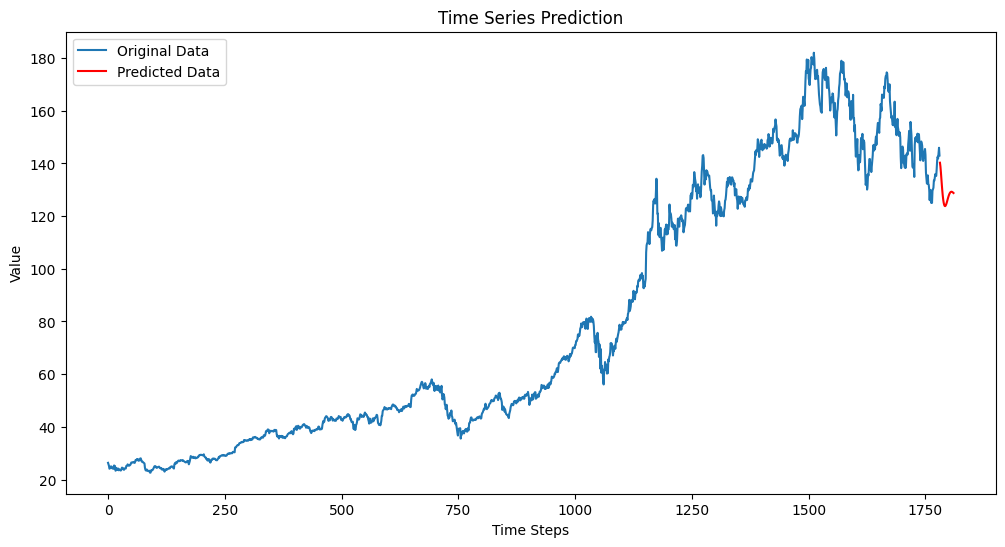

In [139]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(day_new, original_data, label='Original Data')
plt.plot(day_pred, lst_output, label='Predicted Data', color='red')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Time Series Prediction')
plt.legend()
plt.show()

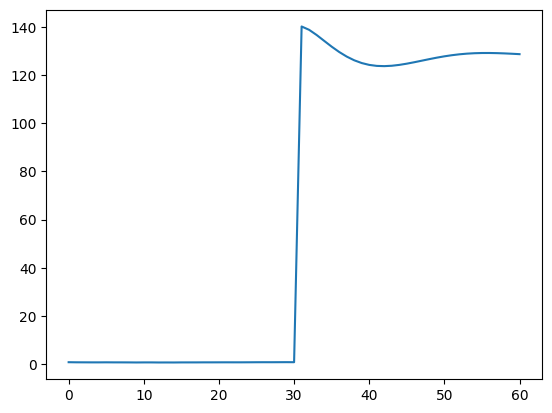

In [153]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1750:])